In [955]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sc
import seaborn as sns
import numpy as np

In [956]:
data = pd.read_csv('df_hack_final.csv')

<Axes: >

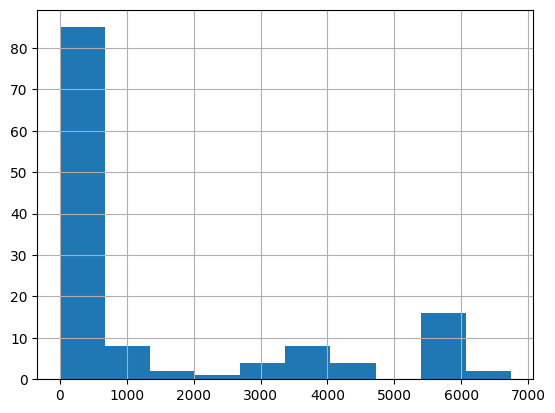

In [957]:
data.isna().sum().hist()

In [958]:
pd.set_option('display.max_columns', None) 

In [959]:
data.head()

,MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,Dens_5,Mass_5,Vol_5,Ni_5F,Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,Dens_6,Mass_6,Vol_6,Ni_6F,Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,Cu_resth,Ni_resth,Cu_1.1C,Ni_1.1C,Cu_1.2C,Ni_1.2C,Cu_2F,Ni_2F,Cu_2.1C,Ni_2.1C,Cu_2.2C,Ni_2.2C,Cu_3F,Ni_3F,Cu_3.1C,Ni_3.1C,Cu_3.2C,Ni_3.2C,Cu_2.1T,Ni_2.1T,Cu_2.2T,Ni_2.2T,Cu_3.1T,Ni_3.1T,Cu_3.2T,Ni_3.2T,Dens_3,Dens_1,Dens_2,Mass_3,FM_1.1_A,Cu_1.1C_max,Cu_1.1C_min,Ni_1.1C_max,Ni_1.1C_min,Ni_1.1T_max,Ni_1.1T_min,FM_1.2_A,Cu_1.2C_max,Cu_1.2C_min,Ni_1.2C_max,Ni_1.2C_min,Ni_1.2T_max,Ni_1.2T_min,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec
0,2024-01-01 00:00:00,2.6097,1.5313,1096.5,1240.597656,692.090942,1.342155,711.999023,1548.71875,0.6232,2.4937,4.1826,NaN,NaN,0.7136,NaN,NaN,NaN,3.8121,NaN,NaN,0.7602,NaN,NaN,NaN,1.346855,476.127625,1021.624939,3.99735,6.2100,NaN,NaN,0.7943,NaN,NaN,NaN,6.7906,NaN,NaN,0.7694,NaN,NaN,NaN,1.344661,219.958878,474.96875,9.09595,9.0939,NaN,NaN,1.3531,NaN,NaN,NaN,9.0980,NaN,NaN,1.2932,NaN,NaN,NaN,1.8008,8.2067,4.4612,2.5949,5.0066,2.9721,4.5836,2.7272,18.0072,2.8705,17.5073,2.5247,13.5003,2.8885,14.3382,2.8217,14.9352,2.7402,0.6405,2.0980,0.4005,2.7056,1.6723,3.9535,1.7310,4.4555,0.808328,1.388724,1.397016,1159.946120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 00:15:00,2.5548,1.4842,1123.0,1205.422363,693.616394,1.339809,710.697815,1556.56250,0.6292,2.5157,4.1037,4.7,4.5,0.7247,0.77,0.67,0.0,3.7383,4.7,4.2,0.7585,0.75,0.68,0.0,1.342700,473.042267,1027.312500,3.92100,6.3300,6.5,6.3,0.8009,0.75,0.68,0.0,6.6420,6.5,6.3,0.7743,0.75,0.65,0.0,1.335838,275.753723,611.09375,9.02795,9.0422,9.5,9.0,1.3338,1.45,1.4,0.0,9.0137,9.5,9.0,1.3044,1.5,1.4,0.0,1.8160,7.8830,4.5157,2.5875,5.1750,3.0450,4.4472,2.7258,18.1457,2.8092,17.4514,2.4793,13.4167,2.9271,14.1753,2.8282,14.6916,2.7704,0.6740,2.0389,0.3986,2.7757,1.4766,3.9686,1.8037,4.2734,0.807156,1.375562,1.397872,1189.409024,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,NaN
2,2024-01-01 00:30:00,2.5109,1.4355,840.0,1188.762573,698.350586,1.339792,707.198547,1548.09375,0.5941,2.5253,4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,1.342700,472.912659,1026.937500,3.95215,6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,6.5325,6.5,6.3,0.7582,0.75,0.65,0.0,1.312747,263.925659,626.93750,8.95510,8.9666,9.5,9.0,1.2827,1.45,1.4,0.0,8.9436,9.5,9.0,1.2598,1.5,1.4,0.0,1.9386,7.7173,4.4968,2.6646,5.1975,3.0923,4.4774,2.7327,16.3150,2.7114,17.3994,2.4534,13.6483,2.8914,13.9210,2.8325,14.5276,2.7553,0.7055,2.0604,0.3968,2.7219,1.2512,4.0164,1.6489,4.4432,0.797312,1.371214,1.399892,1247.048316,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.970170
3,2024-01-01 00:45:00,2.4765,1.3852,824.0,1151.888672,714.678101,1.342392,707.865540,1538.87500,0.6682,2.5418,4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,1.342075,475.598877,1034.750000,3.91770,6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,6.7853,6.5,6.3,0.7656,0.75,0.65,0.0,1.317930,250.852905,586.18750,8.93175,8.9439,9.5,9.0,1.3131,1.45,1.4,0.0,8.9196,

In [960]:
data['MEAS_DT'] = pd.to_datetime(data['MEAS_DT'])
data['MEAS_DT'] = data['MEAS_DT'].apply(lambda x: x.timestamp())


In [961]:
data.head()


,MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,Dens_5,Mass_5,Vol_5,Ni_5F,Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,Dens_6,Mass_6,Vol_6,Ni_6F,Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,Cu_resth,Ni_resth,Cu_1.1C,Ni_1.1C,Cu_1.2C,Ni_1.2C,Cu_2F,Ni_2F,Cu_2.1C,Ni_2.1C,Cu_2.2C,Ni_2.2C,Cu_3F,Ni_3F,Cu_3.1C,Ni_3.1C,Cu_3.2C,Ni_3.2C,Cu_2.1T,Ni_2.1T,Cu_2.2T,Ni_2.2T,Cu_3.1T,Ni_3.1T,Cu_3.2T,Ni_3.2T,Dens_3,Dens_1,Dens_2,Mass_3,FM_1.1_A,Cu_1.1C_max,Cu_1.1C_min,Ni_1.1C_max,Ni_1.1C_min,Ni_1.1T_max,Ni_1.1T_min,FM_1.2_A,Cu_1.2C_max,Cu_1.2C_min,Ni_1.2C_max,Ni_1.2C_min,Ni_1.2T_max,Ni_1.2T_min,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec
0,1.704067e+09,2.6097,1.5313,1096.5,1240.597656,692.090942,1.342155,711.999023,1548.71875,0.6232,2.4937,4.1826,NaN,NaN,0.7136,NaN,NaN,NaN,3.8121,NaN,NaN,0.7602,NaN,NaN,NaN,1.346855,476.127625,1021.624939,3.99735,6.2100,NaN,NaN,0.7943,NaN,NaN,NaN,6.7906,NaN,NaN,0.7694,NaN,NaN,NaN,1.344661,219.958878,474.96875,9.09595,9.0939,NaN,NaN,1.3531,NaN,NaN,NaN,9.0980,NaN,NaN,1.2932,NaN,NaN,NaN,1.8008,8.2067,4.4612,2.5949,5.0066,2.9721,4.5836,2.7272,18.0072,2.8705,17.5073,2.5247,13.5003,2.8885,14.3382,2.8217,14.9352,2.7402,0.6405,2.0980,0.4005,2.7056,1.6723,3.9535,1.7310,4.4555,0.808328,1.388724,1.397016,1159.946120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.704068e+09,2.5548,1.4842,1123.0,1205.422363,693.616394,1.339809,710.697815,1556.56250,0.6292,2.5157,4.1037,4.7,4.5,0.7247,0.77,0.67,0.0,3.7383,4.7,4.2,0.7585,0.75,0.68,0.0,1.342700,473.042267,1027.312500,3.92100,6.3300,6.5,6.3,0.8009,0.75,0.68,0.0,6.6420,6.5,6.3,0.7743,0.75,0.65,0.0,1.335838,275.753723,611.09375,9.02795,9.0422,9.5,9.0,1.3338,1.45,1.4,0.0,9.0137,9.5,9.0,1.3044,1.5,1.4,0.0,1.8160,7.8830,4.5157,2.5875,5.1750,3.0450,4.4472,2.7258,18.1457,2.8092,17.4514,2.4793,13.4167,2.9271,14.1753,2.8282,14.6916,2.7704,0.6740,2.0389,0.3986,2.7757,1.4766,3.9686,1.8037,4.2734,0.807156,1.375562,1.397872,1189.409024,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,NaN
2,1.704069e+09,2.5109,1.4355,840.0,1188.762573,698.350586,1.339792,707.198547,1548.09375,0.5941,2.5253,4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,1.342700,472.912659,1026.937500,3.95215,6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,6.5325,6.5,6.3,0.7582,0.75,0.65,0.0,1.312747,263.925659,626.93750,8.95510,8.9666,9.5,9.0,1.2827,1.45,1.4,0.0,8.9436,9.5,9.0,1.2598,1.5,1.4,0.0,1.9386,7.7173,4.4968,2.6646,5.1975,3.0923,4.4774,2.7327,16.3150,2.7114,17.3994,2.4534,13.6483,2.8914,13.9210,2.8325,14.5276,2.7553,0.7055,2.0604,0.3968,2.7219,1.2512,4.0164,1.6489,4.4432,0.797312,1.371214,1.399892,1247.048316,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.970170
3,1.704070e+09,2.4765,1.3852,824.0,1151.888672,714.678101,1.342392,707.865540,1538.87500,0.6682,2.5418,4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,1.342075,475.598877,1034.750000,3.91770,6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,6.7853,6.5,6.3,0.7656,0.75,0.65,0.0,1.317930,250.852905,586.18750,8.93175,8.9439,9.5,9.0,1.3131,1.45,1.4,0.0,8.9196,9.5,9.0,1.3118,1.5,1.4,0.0,2

In [962]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Columns: 130 entries, MEAS_DT to Ni_rec
dtypes: float64(130)
memory usage: 30.1 MB


<Axes: >

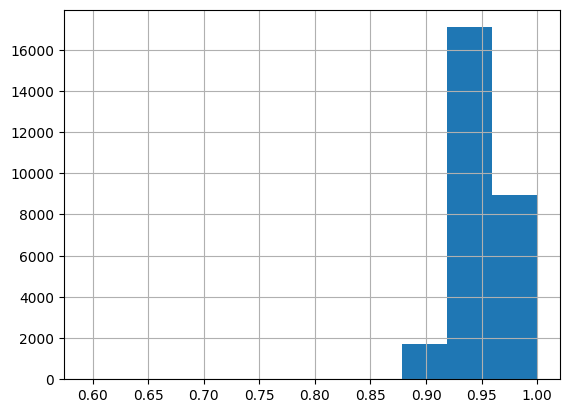

In [963]:
data.Ni_rec.hist()

In [964]:
data.isna().sum()

MEAS_DT           0
Cu_oreth       4123
Ni_oreth       4123
Ore_mass          0
Mass_1            0
Mass_2            0
Dens_4            0
Mass_4            0
Vol_4             0
Cu_4F          4253
Ni_4F          4253
Ni_4.1C        1019
Ni_4.1C_max       1
Ni_4.1C_min       1
Ni_4.1T        3513
Ni_4.1T_max       1
Ni_4.1T_min       1
FM_4.1_A          1
Ni_4.2C        5751
Ni_4.2C_max       1
Ni_4.2C_min       1
Ni_4.2T        5707
Ni_4.2T_max       1
Ni_4.2T_min       1
FM_4.2_A          1
Dens_5            0
Mass_5            0
Vol_5             0
Ni_5F          5887
Ni_5.1C         986
Ni_5.1C_max       1
Ni_5.1C_min       1
Ni_5.1T        5706
Ni_5.1T_max       1
Ni_5.1T_min       1
FM_5.1_A          1
Ni_5.2C        1231
Ni_5.2C_max       1
Ni_5.2C_min       1
Ni_5.2T        3452
Ni_5.2T_max       1
Ni_5.2T_min       1
FM_5.2_A          1
Dens_6            0
Mass_6            0
Vol_6             0
Ni_6F          3167
Ni_6.1C        1131
Ni_6.1C_max       1
Ni_6.1C_min       1


In [965]:
data.Dens_1

0        1.388724
1        1.375562
2        1.371214
3        1.374260
4        1.357874
5        1.350775
6        1.342155
7        1.343552
8        1.343144
9        1.335384
10       1.337640
11       1.336593
12       1.343586
13       1.332713
14       1.324822
15       1.328845
16       1.334831
17       1.348828
18       1.356876
19       1.360767
20       1.365803
21       1.385535
22       1.411014
23       1.414954
24       1.420249
25       1.408286
26       1.427716
27       1.431019
28       1.397588
29       1.377213
30       1.386895
31       1.402253
32       1.392840
33       1.406345
34       1.438227
35       1.433090
36       1.426045
37       1.416775
38       1.409123
39       1.399063
40       1.398248
41       1.403542
42       1.392918
43       1.371070
44       1.366186
45       1.369697
46       1.356812
47       1.353988
48       1.357229
49       1.326471
50       1.295677
51       1.311933
52       1.349515
53       1.369161
54       1.363646
55       1

In [966]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Columns: 130 entries, MEAS_DT to Ni_rec
dtypes: float64(130)
memory usage: 30.1 MB


In [967]:
data.dropna(subset = 'Cu_oreth', inplace = True)       
data.dropna(subset = 'Ni_rec',inplace = True)

In [968]:
data.isna().sum()

MEAS_DT           0
Cu_oreth          0
Ni_oreth          0
Ore_mass          0
Mass_1            0
Mass_2            0
Dens_4            0
Mass_4            0
Vol_4             0
Cu_4F           787
Ni_4F           787
Ni_4.1C         139
Ni_4.1C_max       0
Ni_4.1C_min       0
Ni_4.1T         130
Ni_4.1T_max       0
Ni_4.1T_min       0
FM_4.1_A          0
Ni_4.2C        3786
Ni_4.2C_max       0
Ni_4.2C_min       0
Ni_4.2T        3763
Ni_4.2T_max       0
Ni_4.2T_min       0
FM_4.2_A          0
Dens_5            0
Mass_5            0
Vol_5             0
Ni_5F          3900
Ni_5.1C         219
Ni_5.1C_max       0
Ni_5.1C_min       0
Ni_5.1T        3711
Ni_5.1T_max       0
Ni_5.1T_min       0
FM_5.1_A          0
Ni_5.2C         317
Ni_5.2C_max       0
Ni_5.2C_min       0
Ni_5.2T         107
Ni_5.2T_max       0
Ni_5.2T_min       0
FM_5.2_A          0
Dens_6            0
Mass_6            0
Vol_6             0
Ni_6F          1943
Ni_6.1C         203
Ni_6.1C_max       0
Ni_6.1C_min       0


In [969]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25460 entries, 2 to 30335
Columns: 130 entries, MEAS_DT to Ni_rec
dtypes: float64(130)
memory usage: 25.4 MB


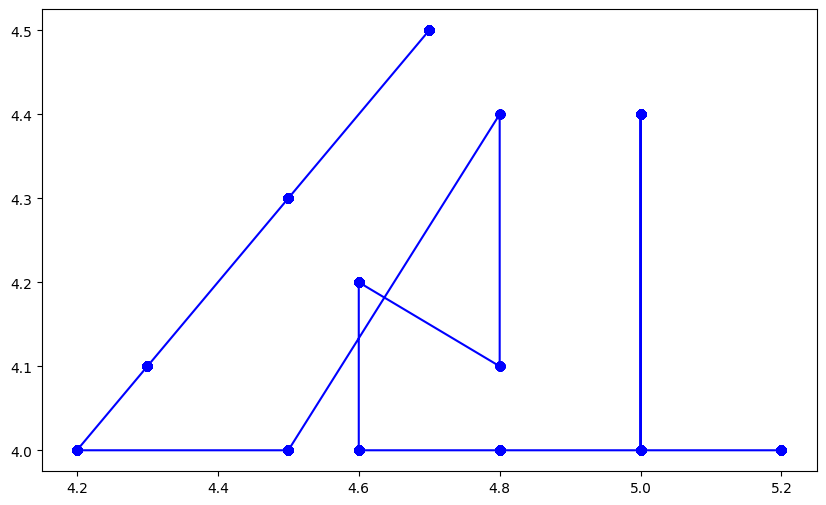

In [970]:
# Построение графика
plt.figure(figsize=(10, 6))
# График Y1
plt.plot(data['Ni_4.1C_max'], data['Ni_4.1C_min'], marker='o', label='Y1', color='blue')

# # График Y2
# plt.plot(data['X'], data['Y2'], marker='o', label='Y2', color='green')

# # График Y3
# plt.plot(data['X'], data['Y3'], marker='o', label='Y3', color='red')

In [971]:
rec_stats = data['Ni_rec'].describe()

# Check for missing values in the target variable
rec_missing = data['Ni_rec'].isnull().sum()

rec_stats, rec_missing

(count    25460.000000
 mean         0.947612
 std          0.020732
 min          0.594336
 25%          0.933534
 50%          0.943713
 75%          0.965939
 max          1.000000
 Name: Ni_rec, dtype: float64,
 np.int64(0))

In [972]:
data['Ni_rec'].isna().sum()

np.int64(0)

In [973]:
# Определяем столбцы с пропусками
columns_with_nan = data.columns[data.isna().any()]

# Создаем новый DataFrame с этими столбцами
data_with_nan_columns = data[columns_with_nan]

In [974]:
data_with_nan_columns.head()

,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1T,Ni_4.2C,Ni_4.2T,Ni_5F,Ni_5.1C,Ni_5.1T,Ni_5.2C,Ni_5.2T,Ni_6F,Ni_6.1C,Ni_6.1T,Ni_6.2C,Ni_6.2T,Cu_1.1C,Ni_1.1C,Cu_1.2C,Ni_1.2C,Cu_2F,Ni_2F,Cu_2.1C,Ni_2.1C,Cu_2.2C,Ni_2.2C,Cu_3F,Ni_3F,Cu_3.1C,Ni_3.1C,Cu_3.2C,Ni_3.2C,Cu_2.1T,Ni_2.1T,Cu_2.2T,Ni_2.2T,Cu_3.1T,Ni_3.1T,Cu_3.2T,Ni_3.2T
2,0.5941,2.5253,4.1911,0.7069,3.7132,0.7613,3.95215,6.2619,0.7829,6.5325,0.7582,8.95510,8.9666,1.2827,8.9436,1.2598,4.4968,2.6646,5.1975,3.0923,4.4774,2.7327,16.3150,2.7114,17.3994,2.4534,13.6483,2.8914,13.9210,2.8325,14.5276,2.7553,0.7055,2.0604,0.3968,2.7219,1.2512,4.0164,1.6489,4.4432
3,0.6682,2.5418,4.1268,0.7097,3.7086,0.7412,3.91770,6.0307,0.7576,6.7853,0.7656,8.93175,8.9439,1.3131,8.9196,1.3118,4.5375,2.6634,4.7779,2.8601,4.4943,2.7428,13.4985,2.8692,18.0951,2.4767,13.2095,3.0479,13.7438,2.8401,14.1897,2.8553,0.6965,2.0800,0.3964,2.7827,0.9814,3.9514,1.3331,4.4488
4,0.6489,2.5559,4.1805,0.7155,3.7558,0.7550,3.96815,6.0333,0.7486,6.7513,0.7583,9.08420,9.1168,1.3491,9.0516,1.4647,4.5612,2.6661,4.7434,2.8084,4.4985,2.7503,13.8650,2.7396,17.7093,2.4251,13.2739,3.0288,13.7098,2.7849,14.4848,2.7443,0.7043,2.0787,0.4000,2.7358,0.8553,3.9408,1.3668,4.4291
5,0.6562,2.5664,4.1513,0.7078,3.7298,0.7344,3.94055,6.1412,0.7445,6.7406,0.7650,9.25035,9.3767,1.3733,9.1240,1.4941,4.5591,2.6527,4.6999,2.8032,4.4614,2.7401,13.6774,2.7929,17.8943,2.4067,13.4554,3.1502,13.6002,2.8521,14.1745,2.7956,0.7068,2.0443,0.4001,2.7679,0.8759,3.8894,1.5237,4.4957
6,0.6130,2.6006,4.1347,0.7197,3.7561,0.7570,3.94540,6.0178,0.7430,6.7126,0.7561,9.27635,9.4228,1.3966,9.1299,1.4994,4.5882,2.4969,4.7658,2.8417,4.5221,2.7504,14.0141,2.7539,17.4454,2.4594,13.0283,3.0218,13.5630,2.8776,14.4655,2.7608,0.6814,2.0860,0.4039,2.7813,0.9157,3.9096,1.4510,4.4319


In [975]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25460 entries, 2 to 30335
Columns: 130 entries, MEAS_DT to Ni_rec
dtypes: float64(130)
memory usage: 25.4 MB


In [976]:
data_with_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25460 entries, 2 to 30335
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cu_4F    24673 non-null  float64
 1   Ni_4F    24673 non-null  float64
 2   Ni_4.1C  25321 non-null  float64
 3   Ni_4.1T  25330 non-null  float64
 4   Ni_4.2C  21674 non-null  float64
 5   Ni_4.2T  21697 non-null  float64
 6   Ni_5F    21560 non-null  float64
 7   Ni_5.1C  25241 non-null  float64
 8   Ni_5.1T  21749 non-null  float64
 9   Ni_5.2C  25143 non-null  float64
 10  Ni_5.2T  25353 non-null  float64
 11  Ni_6F    23517 non-null  float64
 12  Ni_6.1C  25257 non-null  float64
 13  Ni_6.1T  25234 non-null  float64
 14  Ni_6.2C  23685 non-null  float64
 15  Ni_6.2T  23185 non-null  float64
 16  Cu_1.1C  21500 non-null  float64
 17  Ni_1.1C  21500 non-null  float64
 18  Cu_1.2C  25063 non-null  float64
 19  Ni_1.2C  25063 non-null  float64
 20  Cu_2F    21564 non-null  float64
 21  Ni_2F    21564 no

In [977]:
isna_df = pd.DataFrame(data_with_nan_columns.isna().sum()/25460, columns=['NaN_%'] )

In [978]:
isna_df

,NaN_%
Cu_4F,0.030911
Ni_4F,0.030911
Ni_4.1C,0.005460
Ni_4.1T,0.005106
Ni_4.2C,0.148704
Ni_4.2T,0.147800
Ni_5F,0.153181
Ni_5.1C,0.008602
Ni_5.1T,0.145758
Ni_5.2C,0.012451


In [979]:
isna_df_Mean = isna_df[isna_df['NaN_%'] < 0.05 ].index


In [980]:
isna_df_5proc = isna_df[isna_df['NaN_%'] >= 0.05 ]

In [981]:
isna_df_5proc.index

Index(['Ni_4.2C', 'Ni_4.2T', 'Ni_5F', 'Ni_5.1T', 'Ni_6F', 'Ni_6.2C', 'Ni_6.2T',
       'Cu_1.1C', 'Ni_1.1C', 'Cu_2F', 'Ni_2F', 'Cu_2.1C', 'Ni_2.1C', 'Cu_3F',
       'Ni_3F', 'Cu_3.1C', 'Ni_3.1C', 'Cu_2.1T', 'Ni_2.1T', 'Cu_2.2T',
       'Ni_2.2T', 'Cu_3.1T', 'Ni_3.1T'],
      dtype='object')

In [982]:
isna_df_5proc_list = isna_df_5proc.index

In [983]:
isna_df_5proc_list

Index(['Ni_4.2C', 'Ni_4.2T', 'Ni_5F', 'Ni_5.1T', 'Ni_6F', 'Ni_6.2C', 'Ni_6.2T',
       'Cu_1.1C', 'Ni_1.1C', 'Cu_2F', 'Ni_2F', 'Cu_2.1C', 'Ni_2.1C', 'Cu_3F',
       'Ni_3F', 'Cu_3.1C', 'Ni_3.1C', 'Cu_2.1T', 'Ni_2.1T', 'Cu_2.2T',
       'Ni_2.2T', 'Cu_3.1T', 'Ni_3.1T'],
      dtype='object')

In [984]:
corr_map = {}
for feat in isna_df_5proc_list:
    target_feature = feat # Укажите имя признака, для которого ищем коррелирующие признаки
    correlations = data.corr()[target_feature]
    high_corr_features = correlations[abs(correlations) > 0.5].index.tolist()
    corr_map[feat] = high_corr_features

In [985]:
for feat in corr_map:
    print(feat, len(corr_map[feat]))

Ni_4.2C 2
Ni_4.2T 3
Ni_5F 3
Ni_5.1T 4
Ni_6F 7
Ni_6.2C 9
Ni_6.2T 13
Cu_1.1C 1
Ni_1.1C 1
Cu_2F 1
Ni_2F 2
Cu_2.1C 6
Ni_2.1C 6
Cu_3F 6
Ni_3F 8
Cu_3.1C 3
Ni_3.1C 5
Cu_2.1T 22
Ni_2.1T 4
Cu_2.2T 8
Ni_2.2T 19
Cu_3.1T 1
Ni_3.1T 5


In [1005]:
data['Cu_3F'].min() 

np.float64(6.7375)

In [986]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



def fill_NaN(data,feature,corr_list):
    for feat in isna_df_Mean:
        data[feat].fillna(data[feat].median(),inplace = True)   
    if len(corr_list) == 1:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        train_data = data[data[feature].notna()]
        missing_data = data[data[feature].isna()] 

        X_train = train_data[corr_list]  # Используем только выбранные признаки
        X_train.fillna(X_train.median(),inplace=True)
        # print(X_train.isna().sum())
        y_train = train_data[feature]  # Целевая переменная

        X_missing = missing_data[corr_list]  # Данные с пропусками для предсказания
        X_missing.fillna(X_train.median(), inplace=True)

        # Создаем полиномиальные признаки
        degree = 2  # Степень полинома
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_missing_poly = poly.transform(X_missing)

        # Обучаем модель
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        predicted_values = model.predict(X_missing_poly)



        data.loc[data[feature].isna(), feature] = predicted_values





In [987]:
# Определяем столбцы с пропусками
columns_with_nan = data.columns[data.isna().any()]

# Создаем новый DataFrame с этими столбцами
data_with_nan_columns = data[columns_with_nan]

In [988]:
for feat in isna_df_5proc_list:
    fill_NaN(data,feat,corr_map[feat])

C:\Users\Артем\AppData\Local\Temp\ipykernel_13536\4240682860.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feat].fillna(data[feat].median(),inplace = True)
C:\Users\Артем\AppData\Local\Temp\ipykernel_13536\4240682860.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [ ]:
# data.to_csv('df_hack_fineal_fillna')

In [989]:
# #['Ni_4.2C', 'Ni_4.2T', 'Ni_5F', 'Ni_5.1T', 'Ni_6F', 'Ni_6.2C', 'Ni_6.2T',
#        'Cu_1.1C', 'Ni_1.1C', 'Cu_2F', 'Ni_2F', 'Cu_2.1C', 'Ni_2.1C', 'Cu_3F',
#        'Ni_3F', 'Cu_3.1C', 'Ni_3.1C', 'Cu_2.1T', 'Ni_2.1T', 'Cu_2.2T',
#        'Ni_2.2T', 'Cu_3.1T', 'Ni_3.1T']

from sklearn.metrics import mean_squared_error, mean_absolute_error
data_copy = data.copy()

feat_metrix_map = {}

for test_feat in isna_df_5proc_list:
    # Искусственно создаем пропуски в части данных
    test_indices = data_copy.sample(frac=0.1, random_state=42).index
    data_copy.loc[test_indices, test_feat] = None  # Убираем значения

    # Заполняем пропуски с помощью модели
    fill_NaN(data_copy, test_feat, corr_map[test_feat])

    # Сравниваем предсказанные значения с исходными
    predicted_values = data_copy.loc[test_indices, test_feat]
    true_values = data.loc[test_indices, test_feat]

    # Метрики качества
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    feat_metrix_map[test_feat] = [mse,mae]


C:\Users\Артем\AppData\Local\Temp\ipykernel_13536\4240682860.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feat].fillna(data[feat].median(),inplace = True)
C:\Users\Артем\AppData\Local\Temp\ipykernel_13536\4240682860.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [991]:
for feat in feat_metrix_map:
    print(f"{feat}: {feat_metrix_map[feat][0]}, {feat_metrix_map[feat][1]}")

Ni_4.2C: 0.09636973183425056, 0.2236035742340941
Ni_4.2T: 0.006566968150039166, 0.044490691280440926
Ni_5F: 0.052858732499555035, 0.1747018579572018
Ni_5.1T: 0.0016177573055774178, 0.027737313432836648
Ni_6F: 0.0888951731079874, 0.2247051567831204
Ni_6.2C: 0.06971723256365493, 0.1993737318392518
Ni_6.2T: 0.059043564173060906, 0.18750925503379828
Cu_1.1C: 0.04698495670070699, 0.14982513747054205
Ni_1.1C: 0.08227433148075414, 0.20677073841319718
Cu_2F: 0.1362794407148468, 0.2679747054202671
Ni_2F: 0.013626008444619395, 0.08971932443048983
Cu_2.1C: 0.9022369673723226, 0.7009152003142717
Ni_2.1C: 0.17642014963863809, 0.28872623723488205
Cu_3F: 3.0636880577926364, 1.1931144540456158
Ni_3F: 0.22220268350745565, 0.3012649253731527
Cu_3.1C: 1.967931298860925, 0.9609501963865242
Ni_3.1C: 0.09422292638649053, 0.18668106834249917
Cu_2.1T: 0.003775647312793524, 0.04611814080339986
Ni_2.1T: 0.06972040676649725, 0.1891840730557766
Cu_2.2T: 0.004703729774523271, 0.046202598263009736
Ni_2.2T: 0.031486

In [1012]:
data.head()

,MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,Dens_5,Mass_5,Vol_5,Ni_5F,Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,Dens_6,Mass_6,Vol_6,Ni_6F,Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,Cu_resth,Ni_resth,Cu_1.1C,Ni_1.1C,Cu_1.2C,Ni_1.2C,Cu_2F,Ni_2F,Cu_2.1C,Ni_2.1C,Cu_2.2C,Ni_2.2C,Cu_3F,Ni_3F,Cu_3.1C,Ni_3.1C,Cu_3.2C,Ni_3.2C,Cu_2.1T,Ni_2.1T,Cu_2.2T,Ni_2.2T,Cu_3.1T,Ni_3.1T,Cu_3.2T,Ni_3.2T,Dens_3,Dens_1,Dens_2,Mass_3,FM_1.1_A,Cu_1.1C_max,Cu_1.1C_min,Ni_1.1C_max,Ni_1.1C_min,Ni_1.1T_max,Ni_1.1T_min,FM_1.2_A,Cu_1.2C_max,Cu_1.2C_min,Ni_1.2C_max,Ni_1.2C_min,Ni_1.2T_max,Ni_1.2T_min,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec
2,1.704069e+09,2.5109,1.4355,840.0,1188.762573,698.350586,1.339792,707.198547,1548.09375,0.5941,2.5253,4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,1.342700,472.912659,1026.9375,3.95215,6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,6.5325,6.5,6.3,0.7582,0.75,0.65,0.0,1.312747,263.925659,626.93750,8.95510,8.9666,9.5,9.0,1.2827,1.45,1.4,0.0,8.9436,9.5,9.0,1.2598,1.5,1.4,0.0,1.9386,7.7173,4.4968,2.6646,5.1975,3.0923,4.4774,2.7327,16.3150,2.7114,17.3994,2.4534,13.6483,2.8914,13.9210,2.8325,14.5276,2.7553,0.7055,2.0604,0.3968,2.7219,1.2512,4.0164,1.6489,4.4432,0.797312,1.371214,1.399892,1247.048316,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.970170
3,1.704070e+09,2.4765,1.3852,824.0,1151.888672,714.678101,1.342392,707.865540,1538.87500,0.6682,2.5418,4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,1.342075,475.598877,1034.7500,3.91770,6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,6.7853,6.5,6.3,0.7656,0.75,0.65,0.0,1.317930,250.852905,586.18750,8.93175,8.9439,9.5,9.0,1.3131,1.45,1.4,0.0,8.9196,9.5,9.0,1.3118,1.5,1.4,0.0,2.0530,7.8480,4.5375,2.6634,4.7779,2.8601,4.4943,2.7428,13.4985,2.8692,18.0951,2.4767,13.2095,3.0479,13.7438,2.8401,14.1897,2.8553,0.6965,2.0800,0.3964,2.7827,0.9814,3.9514,1.3331,4.4488,0.791000,1.374260,1.408990,1323.884446,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.968639
4,1.704071e+09,2.3585,1.3368,0.0,1104.101318,730.190674,1.337608,700.935059,1545.18750,0.6489,2.5559,4.1805,4.7,4.5,0.7155,0.77,0.67,0.0,3.7558,4.7,4.2,0.7550,0.75,0.68,0.0,1.340294,473.865509,1036.3750,3.96815,6.0333,6.5,6.3,0.7486,0.75,0.68,0.0,6.7513,6.5,6.3,0.7583,0.75,0.65,0.0,1.311027,256.771332,615.59375,9.08420,9.1168,9.5,9.0,1.3491,1.45,1.4,0.0,9.0516,9.5,9.0,1.4647,1.5,1.4,0.0,2.1132,7.9884,4.5612,2.6661,4.7434,2.8084,4.4985,2.7503,13.8650,2.7396,17.7093,2.4251,13.2739,3.0288,13.7098,2.7849,14.4848,2.7443,0.7043,2.0787,0.4000,2.7358,0.8553,3.9408,1.3668,4.4291,0.799141,1.357874,1.414643,1295.851179,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.974205
5,1.704072e+09,2.3672,1.3081,781.0,1077.806885,738.083862,1.336420,697.026794,1542.00000,0.6562,2.5664,4.1513,4.7,4.5,0.7078,0.77,0.67,0.0,3.7298,4.7,4.2,0.7344,0.75,0.68,0.0,1.343883,453.330566,982.8125,3.94055,6.1412,6.5,6.3,0.7445,0.75,0.68,0.0,6.7406,6.5,6.3,0.7650,0.75,0.65,0.0,1.310433,253.524994,607.81250,9.25035,9.3767,9.5,9.0,1.3733,1.45,1.4,0.0,9.1240,9.5,9.

In [992]:
# Определяем столбцы с пропусками
columns_with_nan = data.columns[data.isna().any()]

# Создаем новый DataFrame с этими столбцами
data_with_nan_columns = data[columns_with_nan]

In [993]:
data.isna().sum().sum()

np.int64(0)

In [994]:
data['Cu_2.1T'].isna().sum()

np.int64(0)

<Axes: >

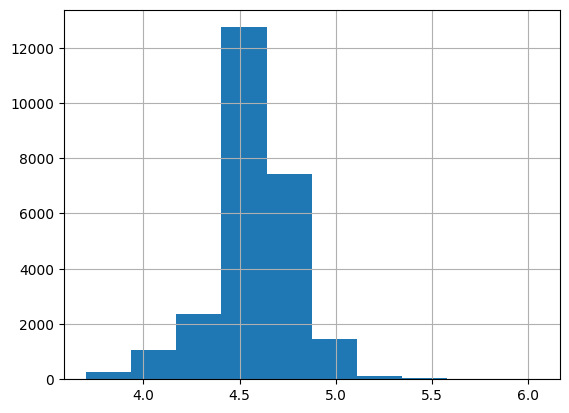

In [995]:
data['Cu_1.1C'].hist()

In [996]:
data['Cu_1.1C'].median()

np.float64(4.5988)

In [997]:
data['Cu_1.1C'].mode()

0    4.5988
Name: Cu_1.1C, dtype: float64

In [998]:
data['Cu_1.1C'].mean()

np.float64(4.5863149057344845)

In [999]:
isna_df_Mean

Index(['Cu_4F', 'Ni_4F', 'Ni_4.1C', 'Ni_4.1T', 'Ni_5.1C', 'Ni_5.2C', 'Ni_5.2T',
       'Ni_6.1C', 'Ni_6.1T', 'Cu_1.2C', 'Ni_1.2C', 'Cu_2.2C', 'Ni_2.2C',
       'Cu_3.2C', 'Ni_3.2C', 'Cu_3.2T', 'Ni_3.2T'],
      dtype='object')

In [1000]:
data_with_nan_columns_str = data_with_nan_columns[data_with_nan_columns.isna().any(axis=1)]

In [1001]:
data_with_nan_columns_str.head()

""


In [1002]:
sns.boxplot(data_with_nan_columns_str.Ni_6F)

AttributeError: 'DataFrame' object has no attribute 'Ni_6F'

In [ ]:
data.head()

,MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,Dens_5,Mass_5,Vol_5,Ni_5F,Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,Dens_6,Mass_6,Vol_6,Ni_6F,Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,Cu_resth,Ni_resth,Cu_1.1C,Ni_1.1C,Cu_1.2C,Ni_1.2C,Cu_2F,Ni_2F,Cu_2.1C,Ni_2.1C,Cu_2.2C,Ni_2.2C,Cu_3F,Ni_3F,Cu_3.1C,Ni_3.1C,Cu_3.2C,Ni_3.2C,Cu_2.1T,Ni_2.1T,Cu_2.2T,Ni_2.2T,Cu_3.1T,Ni_3.1T,Cu_3.2T,Ni_3.2T,Dens_3,Dens_1,Dens_2,Mass_3,FM_1.1_A,Cu_1.1C_max,Cu_1.1C_min,Ni_1.1C_max,Ni_1.1C_min,Ni_1.1T_max,Ni_1.1T_min,FM_1.2_A,Cu_1.2C_max,Cu_1.2C_min,Ni_1.2C_max,Ni_1.2C_min,Ni_1.2T_max,Ni_1.2T_min,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec
2,1.704069e+09,2.5109,1.4355,840.0,1188.762573,698.350586,1.339792,707.198547,1548.09375,0.5941,2.5253,4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,1.342700,472.912659,1026.9375,3.95215,6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,6.5325,6.5,6.3,0.7582,0.75,0.65,0.0,1.312747,263.925659,626.93750,8.95510,8.9666,9.5,9.0,1.2827,1.45,1.4,0.0,8.9436,9.5,9.0,1.2598,1.5,1.4,0.0,1.9386,7.7173,4.4968,2.6646,5.1975,3.0923,4.4774,2.7327,16.3150,2.7114,17.3994,2.4534,13.6483,2.8914,13.9210,2.8325,14.5276,2.7553,0.7055,2.0604,0.3968,2.7219,1.2512,4.0164,1.6489,4.4432,0.797312,1.371214,1.399892,1247.048316,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.970170
3,1.704070e+09,2.4765,1.3852,824.0,1151.888672,714.678101,1.342392,707.865540,1538.87500,0.6682,2.5418,4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,1.342075,475.598877,1034.7500,3.91770,6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,6.7853,6.5,6.3,0.7656,0.75,0.65,0.0,1.317930,250.852905,586.18750,8.93175,8.9439,9.5,9.0,1.3131,1.45,1.4,0.0,8.9196,9.5,9.0,1.3118,1.5,1.4,0.0,2.0530,7.8480,4.5375,2.6634,4.7779,2.8601,4.4943,2.7428,13.4985,2.8692,18.0951,2.4767,13.2095,3.0479,13.7438,2.8401,14.1897,2.8553,0.6965,2.0800,0.3964,2.7827,0.9814,3.9514,1.3331,4.4488,0.791000,1.374260,1.408990,1323.884446,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.968639
4,1.704071e+09,2.3585,1.3368,0.0,1104.101318,730.190674,1.337608,700.935059,1545.18750,0.6489,2.5559,4.1805,4.7,4.5,0.7155,0.77,0.67,0.0,3.7558,4.7,4.2,0.7550,0.75,0.68,0.0,1.340294,473.865509,1036.3750,3.96815,6.0333,6.5,6.3,0.7486,0.75,0.68,0.0,6.7513,6.5,6.3,0.7583,0.75,0.65,0.0,1.311027,256.771332,615.59375,9.08420,9.1168,9.5,9.0,1.3491,1.45,1.4,0.0,9.0516,9.5,9.0,1.4647,1.5,1.4,0.0,2.1132,7.9884,4.5612,2.6661,4.7434,2.8084,4.4985,2.7503,13.8650,2.7396,17.7093,2.4251,13.2739,3.0288,13.7098,2.7849,14.4848,2.7443,0.7043,2.0787,0.4000,2.7358,0.8553,3.9408,1.3668,4.4291,0.799141,1.357874,1.414643,1295.851179,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.974205
5,1.704072e+09,2.3672,1.3081,781.0,1077.806885,738.083862,1.336420,697.026794,1542.00000,0.6562,2.5664,4.1513,4.7,4.5,0.7078,0.77,0.67,0.0,3.7298,4.7,4.2,0.7344,0.75,0.68,0.0,1.343883,453.330566,982.8125,3.94055,6.1412,6.5,6.3,0.7445,0.75,0.68,0.0,6.7406,6.5,6.3,0.7650,0.75,0.65,0.0,1.310433,253.524994,607.81250,9.25035,9.3767,9.5,9.0,1.3733,1.45,1.4,0.0,9.1240,9.5,9.